In [1]:
# load modules and functions 
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from typing import NoReturn
from colorama import Fore, Back, Style
from datetime import time, timedelta

import My_Function_050824_M_Filimonov as mvf # loading functions written by me for the Project from a file

# 2.  Описательная статистика
- Сводная статистика для числовых полей (среднее значение, медиана, стандартное отклонение диапазон)
- Анализ категориальных полей (качество, стадия, источник и продукт)

### 2.1 CALLS

In [2]:
# load DataFrame
calls = pd.read_pickle("01_calls.pkl")

#### CALLS Рассчет сводной статистики

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
calls.describe(include=['int','float']).T

,count,mean,std,min,25%,50%,75%,max
Call_Duration,95588.00,164.86,401.45,0.00,4.00,8.00,97.00,7625.00


- данные по Call_Duration приведены в секундах

#### CALLS Визуализация сводной статистики

Statistical characteristics of number fields:

Call_Duration:
 Max: 7625.00
 Min: 0.00
 Mean: 164.86
 std: 401.45
 Median: 8.00
 Mode: 0.00
 Range: 7625.00
----------------------------------------


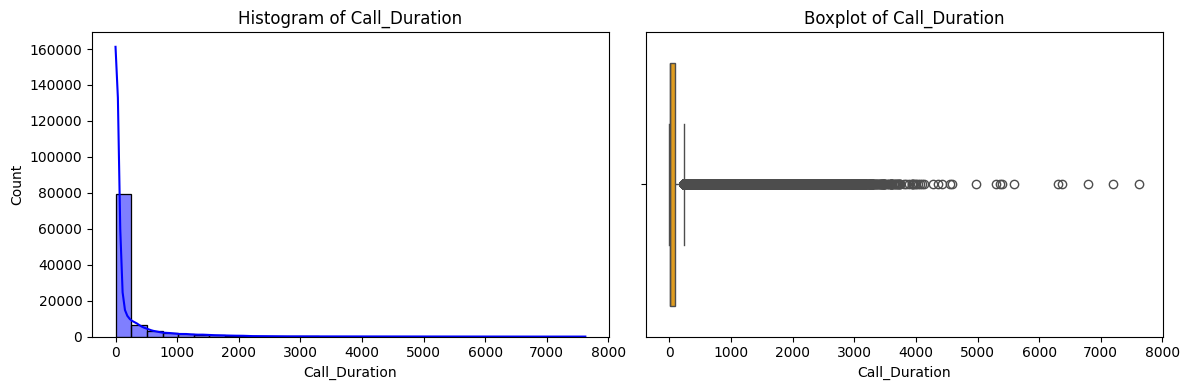

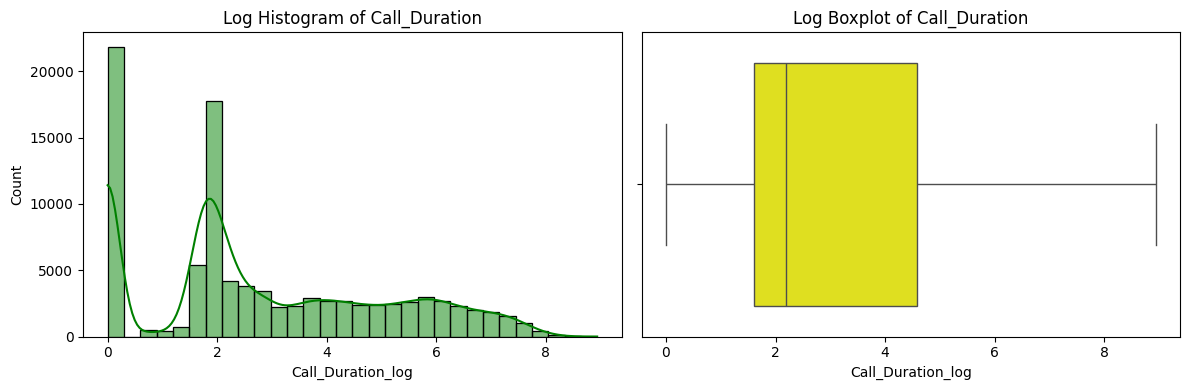

In [4]:
# run function num_fields_analyze()
mvf.num_fields_analyze(calls,['Call_Duration'],['Call_Duration'])

#### CALLS Анализ сводной статистики

**Pаспределение времени звонков Call_Duration** показывает достаточно широкий разброс данных:
- Значения варьируются от 0 до 7625 (2.1 часа), показывая экстремальные выбросы;
- Средняя продолжительность звонка составляет 164,86 сек, или около 3 минут;
- При этом медиана составляет 8 сек, что указывает на сильное смещение данных в сторону малых значений;
- 50% всех звонков лежат в пределах 4 - 97 сек (1,62 мин);
- Мода: 0 секунд, что указывает на большое количество неудавшиеся или сброшенных звонков.
- Статистика выбросов:
    - Верхняя граница (upper fence) равна 236, что объясняет наличие значительного числа выбросов выше этого значения;
    - Большая часть данных сосредоточена в пределах значений от 0 до 100, а остальное — аномально высокие значения.

#### CALLS Анализ категориальных полей

In [5]:
calls.describe(include=['object','category']).T

,count,unique,top,freq
Call_Owner_Name,95588,32,Yara Edwards,9057
Call_Type,95588,3,Outbound,86835
Id,95588,95588,5805028000056839476,1
CONTACTID,95588,15214,5805028000003329100,105
Call_Status,95588,11,Attended Dialled,70673
Outgoing_Call_Status,95588,5,Completed,86759
Scheduled_in_CRM,95588,3,no,86700


In [6]:
calls.select_dtypes(include=['object', 'category']).columns.tolist()

['Call_Owner_Name',
 'Call_Type',
 'Id',
 'CONTACTID',
 'Call_Status',
 'Outgoing_Call_Status',
 'Scheduled_in_CRM']

Distribution of categorical variables:

Call_Owner_Name (Unique values: 32):
  Yara Edwards: 9057 records (9.5%)
  Julia Nelson: 7433 records (7.8%)
  Charlie Davis: 7180 records (7.5%)
  Ian Miller: 7177 records (7.5%)
  Diana Evans: 6846 records (7.2%)
  Ulysses Adams: 6062 records (6.3%)
  Amy Green: 5978 records (6.3%)
  Nina Scott: 5565 records (5.8%)
  Victor Barnes: 5422 records (5.7%)
  Kevin Parker: 5394 records (5.6%)
  Paula Underwood: 4570 records (4.8%)
  Quincy Vincent: 4367 records (4.6%)
  Jane Smith: 3746 records (3.9%)
  Cara Iverson: 3300 records (3.5%)
  Ben Hall: 2947 records (3.1%)
  John Doe: 2927 records (3.1%)
  Alice Johnson: 1250 records (1.3%)
  Mason Roberts: 1165 records (1.2%)
  Derek James: 945 records (1.0%)
  George King: 850 records (0.9%)
  Zachary Foster: 518 records (0.5%)
  Eva Kent: 493 records (0.5%)
  Fiona Jackson: 470 records (0.5%)
  Sam Young: 456 records (0.5%)
  Rachel White: 441 records (0.5%)
  Xander Dean: 304 records (0.3%)
  Ethan Ha

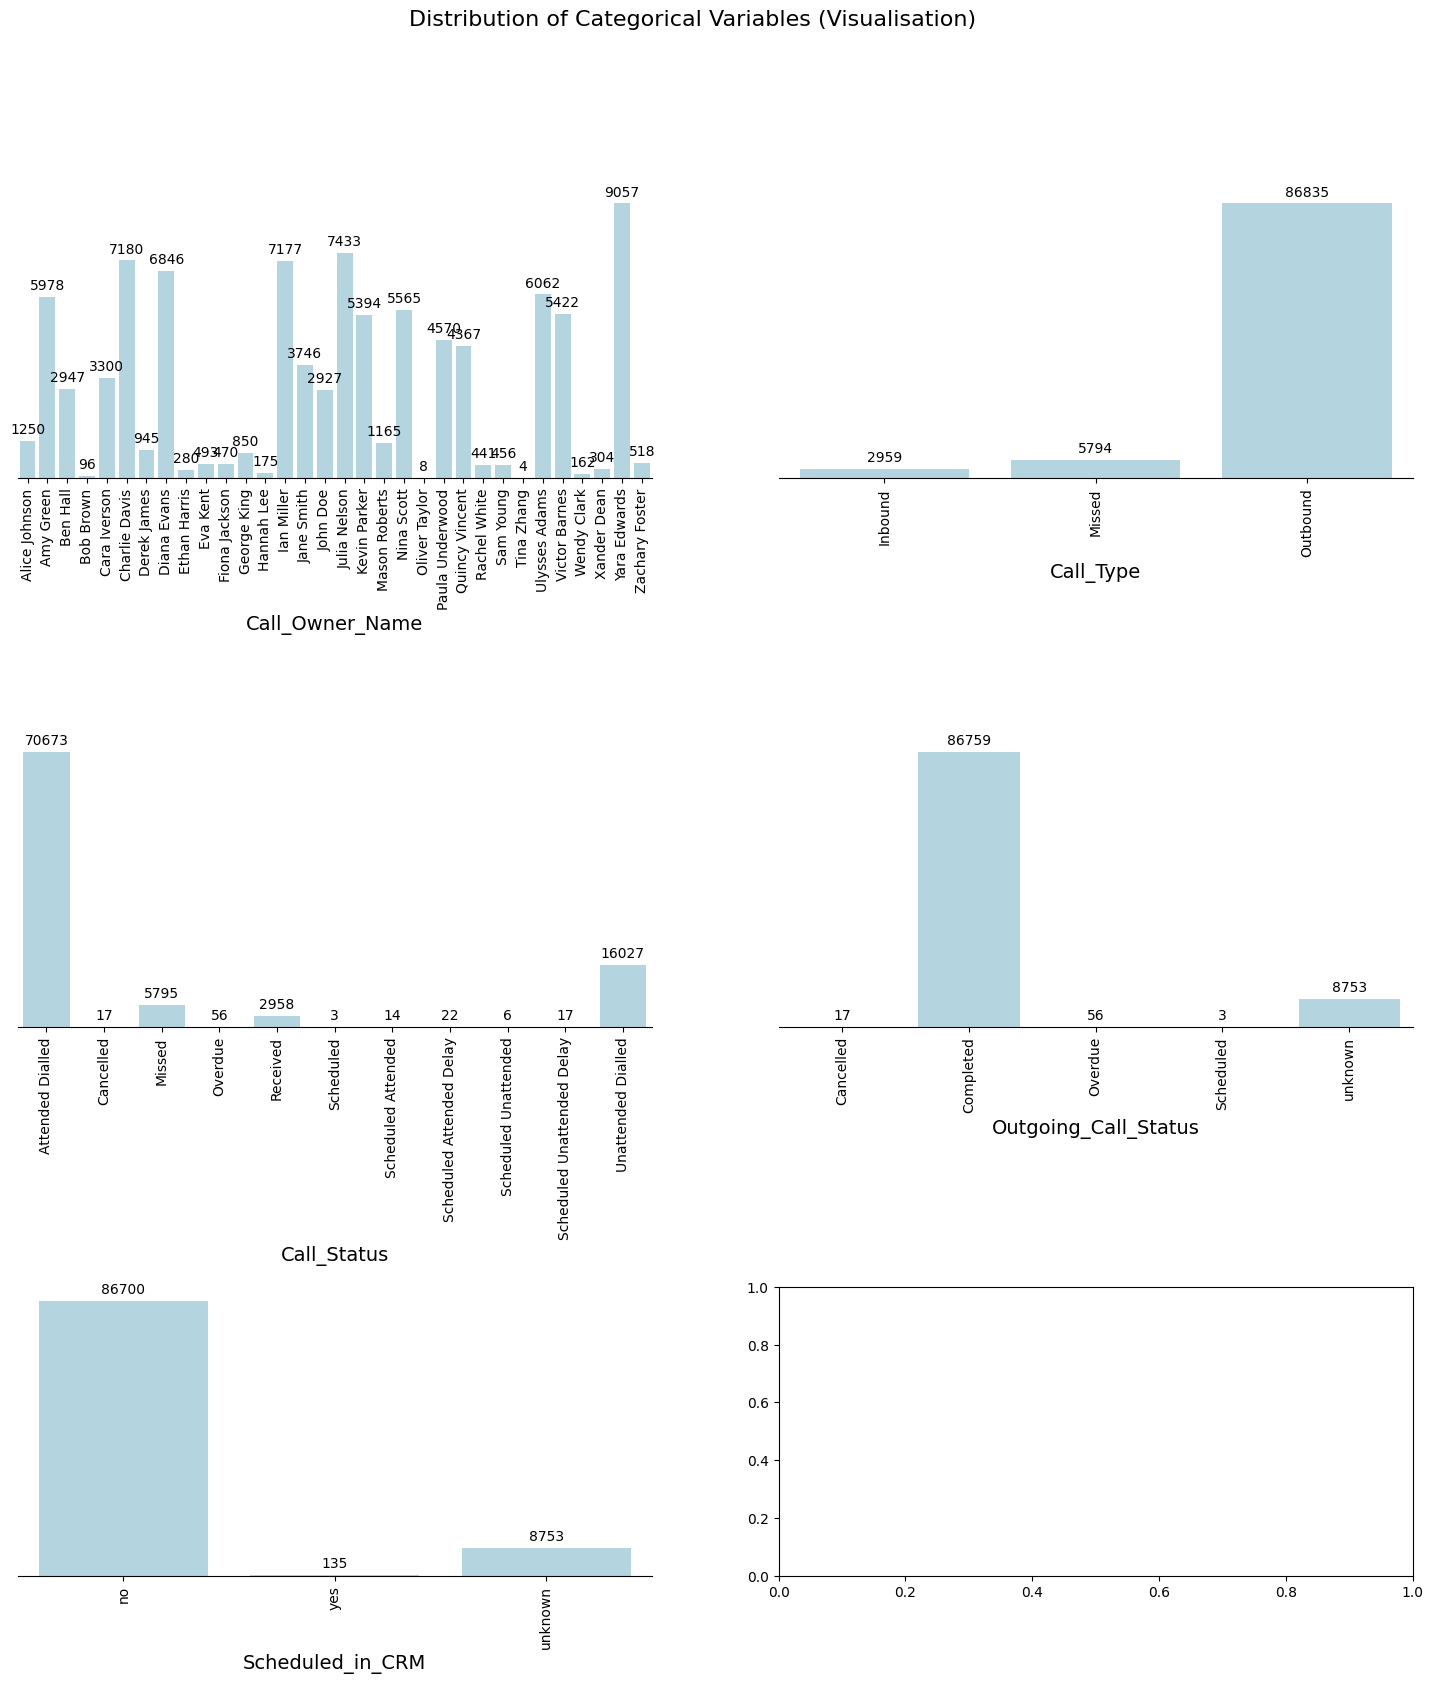

In [7]:
# Distribution of categorical variables
mvf.plot_categorical_distribution(calls,['Call_Owner_Name','Call_Type','Call_Status', 'Outgoing_Call_Status', 'Scheduled_in_CRM'])

##### **Типы звонков Call_Type**
- **Outbound**: 86,835 (90.8%) - Большинство звонков являются исходящими, что указывает на активную работу отдела продаж;
- **Missed**: 5,794 (6.1%) - Количество пропущенных звонков достаточно велико, свидетельствует о том, что количество сотрудников для обработки звонков недостаточно;
- **Inbound**: 2,959 (3.1%) - доля входящих звонков составляют лишь небольшую часть от общего числа, что может указывать на неэффективную стратегию привлечения клиентов.

##### **Статусы звонков (Call_Status)**:
- **Attended Dialled**: 70673 records (73.9%) - Исходящий звонок, на который ответил адресат. Наибольшее количество звонков было успешно обработано, что говорит о хорошем уровне взаимодействия с клиентами;
- **Unattended Dialled**: 16027 records (16.8%) - Исходящий звонок, на который адресат не ответил (Сотрудник звонит клиенту для подтверждения заказа, но трубка не взята), значение высокое и требует внимания при оценке работы отдела продаж;
- **Missed**: 5795 records (6.1%) - Повторное появление в статусах звонков, что подчеркивает необходимость решения проблемы с пропущенными вызовами;
- **Received**: 2958 records (3.1%) - Входящие звонки, на которые был дан ответ, показывают небольшую долю успешно обработанных входящих звонков. При сравнении с числом пропущенных вызовов показывает значительный потенциал для отдела продаж;
- **Overdue**: 56 records (0.1%) - Просроченный звонок, который должен был быть выполнен в установленный срок (Сотрудник не позвонил клиенту в обозначенное время) можно использовать при персональной оценке сотрудников отдела продаж;
- **Scheduled Attended Delay**: 22 records (0.0%) Запланированный звонок, выполненный с задержкой, клиент ответил. Подчеркивает лояльность и заинтересованность клиента;
- **Cancelled**: 17 records (0.0%) - Звонок, который был отменен до завершения, небольшое количество, свидетельствует о томб что ситуации когда клиент завершает звонок до ответа или сотрудник отменяет вызов достаточно редкие для исходящих звонков;
- **Scheduled Unattended Delay**: 17 records (0.0%) - Запланированный звонок, выполненный с задержкой, но клиент не ответил, несущественное количество.
- **Scheduled Attended**: 14 records (0.0%) - Запланированный звонок, выполненный с задержкой, и клиент ответил
- **Scheduled Unattended**: 6 records (0.0%) - Запланированный звонок, выполненный с задержкой, но клиент не ответил, несущественное количество.
- **Scheduled**: 3 records (0.0%) - Запланированный звонок, низкое количество, может свидетельствовать о том, что информация в CRM не заносится регулярно.

##### **Статусы исходящих звонков (Outgoing_Call_Status)**:
- **Completed**: 86759 records (90.8%) - Высокий процент завершённых звонков. Являеся суммой Attended Dialled + Unattended Dialled + Overdue + Scheduled из статуса звонков. Дублирование информации с полем статуса звонков ;
- **unknown**: 8753 records (9.2%) - Значительное количество звонков с неопределённым статусом требует внимания, так как это может указывать на необходимость улучшения учёта звонков ;
- **Overdue**: 56 records (0.1%) - Просроченный звонок, небольшое количество. Дублирование со статусом звонков. 
- **Cancelled**: 17 records (0.0%) - Звонок, который был отменен до завершения, небольшое количество. Дублирование со статусом звонков. 
- **Scheduled**: 3 records (0.0%) - Запланированный звонок, низкое количество, может свидетельствовать о том, что информация в CRM не заносится

##### **Выводы**: 
- среди всех звонков преобладают исходящие (90,8%), что с одной стороны говорит о интенсивной работе отдела продаж, с другой стороны может указывать на неэффективную стратегию привлечения клиентов;
- между сотрудниками отдела продаж количество звонков распределено очень неравномерно, только 10 из 32 имеют более 5000 общего количества звонков. Заслуживает отдельного анализа далее;
- достаточно высокий процент пропущенных звонков (6.1%) свидетельствует о недостатках подбора и работы с персоналом  в отделе продаж;
- дублирование информации статуса звонков (Call_Status) со статусом исходящих звонков  (Outgoing_Call_Status) cвидетельствует о нерациональных решениях при проектировании базы данных CRM;
- одинаковое число звонков со значением 'unknown' в поле Outgoing_Call_Status ( 9.2%) и поле Scheduled_in_CRM ( 9.2%) свидетельствовать о том, что информация в CRM не заносится регулярно.

##### Определим **продуктивность** звонков (performance). Для этого разделим их по группам:
- звонки, которые имели место и могли стать эффективными; **took_place** 
- звонки статус которых показывает, что они не состоялись **failed**

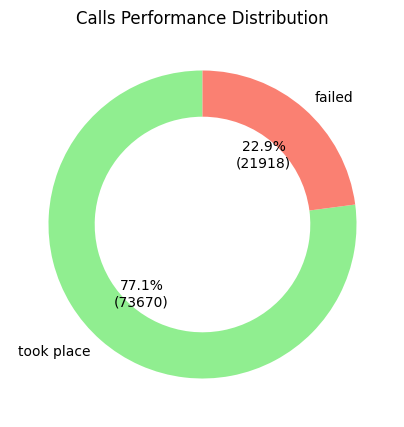

In [8]:
# Creating a new performance field
calls['performance'] = calls['Call_Status'].apply(
    lambda x: "took place" if x in ["Attended Dialled", "Scheduled Attended", 
                                    "Scheduled Attended Delay", "Received", "Scheduled"]
    else "failed" if x in ["Missed", "Unattended Dialled", "Scheduled Unattended Delay",
                           "Scheduled Unattended", "Overdue", "Cancelled"]
    else "unknown"
)
# Count the number of values in calls['performance']
performance_counts = calls['performance'].value_counts()

# Build a donut chart
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    performance_counts, labels=performance_counts.index, 
    autopct=lambda p: f"{p:.1f}%\n({int(p * sum(performance_counts) / 100)})",
    startangle=90, colors=['lightgreen', 'salmon'], wedgeprops=dict(width=0.3)
)

# Customize caption style
for text in autotexts:
    text.set_fontsize(10)

plt.title("Calls Performance Distribution")
plt.show()

**Вывод:**
- Из диаграммы видно, что только 77,1% звонков были продуктивными.
- Таким образом определенно **существует значительный потенциал** для улучшения работы отдела продаж.

### 2.2 CONTACTS

In [9]:
# load DataFrame
contacts = pd.read_pickle("02_contacts.pkl")
contacts.dtypes

Id                            object
Contact_Owner_Name          category
Created_Time          datetime64[ns]
Modified_Time         datetime64[ns]
dtype: object

#### ⚠ CONTACTS не содержит числовых полей, следовательно нельзя построить сводную статистику

#### CONTACTS Анализ категориальных полей

In [10]:
contacts.describe(include=['object','category'])

,Id,Contact_Owner_Name
count,18548,18548
unique,18548,27
top,5805028000056907001,Charlie Davis
freq,1,2018


**Id** - идентификатор, следовательно в анализ не включаем

Distribution of categorical variables:

Contact_Owner_Name (Unique values: 27):
  Charlie Davis: 2018 records (10.9%)
  Ulysses Adams: 1816 records (9.8%)
  Julia Nelson: 1769 records (9.5%)
  Paula Underwood: 1487 records (8.0%)
  Quincy Vincent: 1416 records (7.6%)
  Nina Scott: 1150 records (6.2%)
  Ben Hall: 1038 records (5.6%)
  Victor Barnes: 967 records (5.2%)
  Cara Iverson: 880 records (4.7%)
  Rachel White: 782 records (4.2%)
  Jane Smith: 755 records (4.1%)
  Bob Brown: 685 records (3.7%)
  Ian Miller: 684 records (3.7%)
  Diana Evans: 678 records (3.7%)
  Yara Edwards: 655 records (3.5%)
  Amy Green: 621 records (3.3%)
  Eva Kent: 365 records (2.0%)
  Kevin Parker: 325 records (1.8%)
  Mason Roberts: 217 records (1.2%)
  George King: 144 records (0.8%)
  Sam Young: 37 records (0.2%)
  Alice Johnson: 27 records (0.1%)
  Oliver Taylor: 19 records (0.1%)
  Zachary Foster: 8 records (0.0%)
  Tina Zhang: 2 records (0.0%)
  Wendy Clark: 2 records (0.0%)
  Derek James: 1 records (

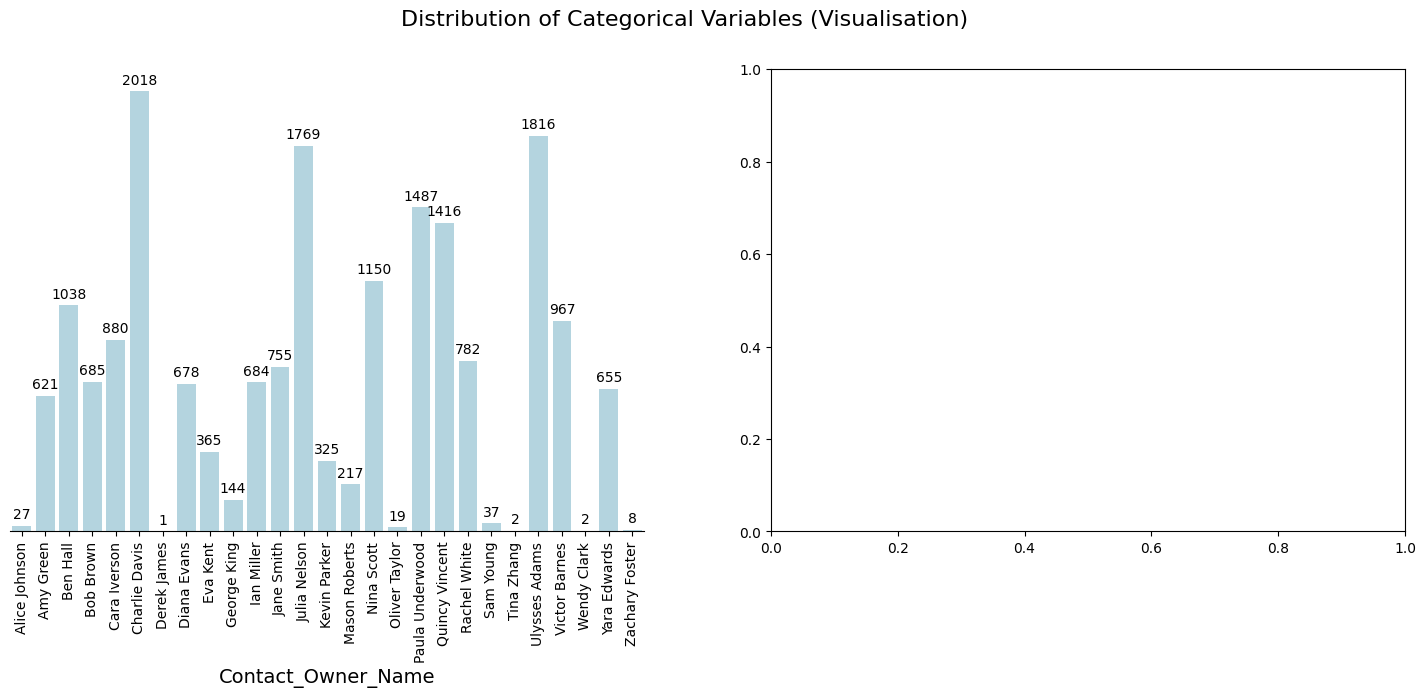

In [11]:
# Distribution of categorical variables
mvf.plot_categorical_distribution(contacts,['Contact_Owner_Name'])

##### Вывод:
В датафрейме представлено только одно категориальное поле **Contact_Owner_Name** которое отражает число контактов у каждого сотрудника отдела продаж.
Среди 27 сотрудников наблюдается большой разброс от 1 (Derek James) до 2018/10.9% (Charlie Davis) контактов. Эта ситуация свидетельствует о неравномерной загрузке сотрудников, вероятно в зависимости от их уровня профессиональной подготовки, а так же возможно от продолжительности работы в отделе. 

### 2.3 SPEND

#### SPEND Рассчет сводной статистики

In [12]:
# загружаем датафрейм
spend = pd.read_pickle("03_spend.pkl")
spend.describe(include=['int','float'])

,Impressions,Spend,Clicks
count,19862.00,19862.00,19862.00
mean,2571.70,7.53,25.10
std,11691.23,27.33,87.03
min,0.00,0.00,0.00
25%,1.00,0.00,0.00
50%,82.00,0.74,2.00
75%,760.75,6.16,13.00
max,431445.00,774.00,2415.00


#### SPEND Визуализация сводной статистики

Statistical characteristics of number fields:

Impressions:
 Max: 431445.00
 Min: 0.00
 Mean: 2571.70
 std: 11691.23
 Median: 82.00
 Mode: 0.00
 Range: 431445.00
----------------------------------------
Spend:
 Max: 774.00
 Min: 0.00
 Mean: 7.53
 std: 27.33
 Median: 0.74
 Mode: 0.00
 Range: 774.00
----------------------------------------
Clicks:
 Max: 2415.00
 Min: 0.00
 Mean: 25.10
 std: 87.03
 Median: 2.00
 Mode: 0.00
 Range: 2415.00
----------------------------------------


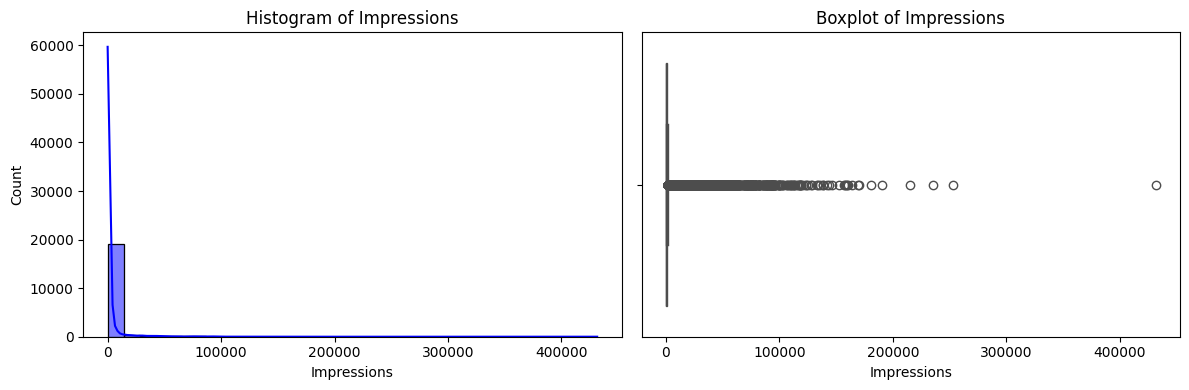

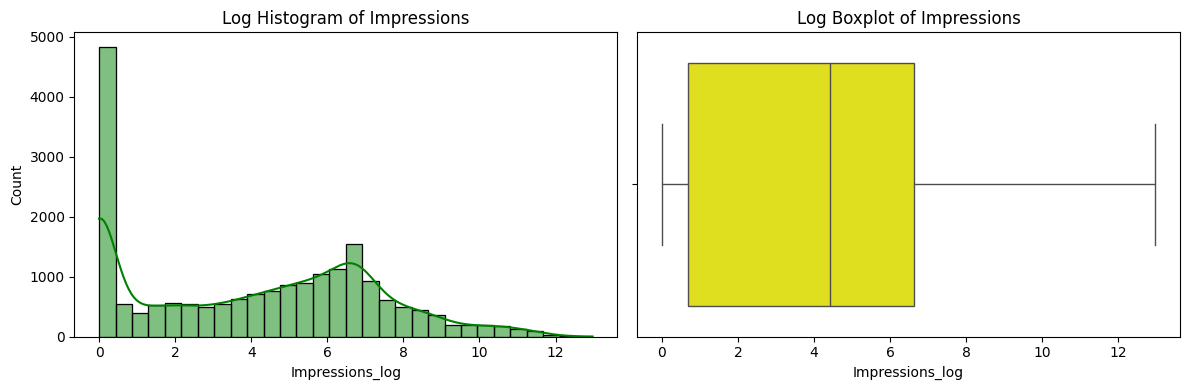

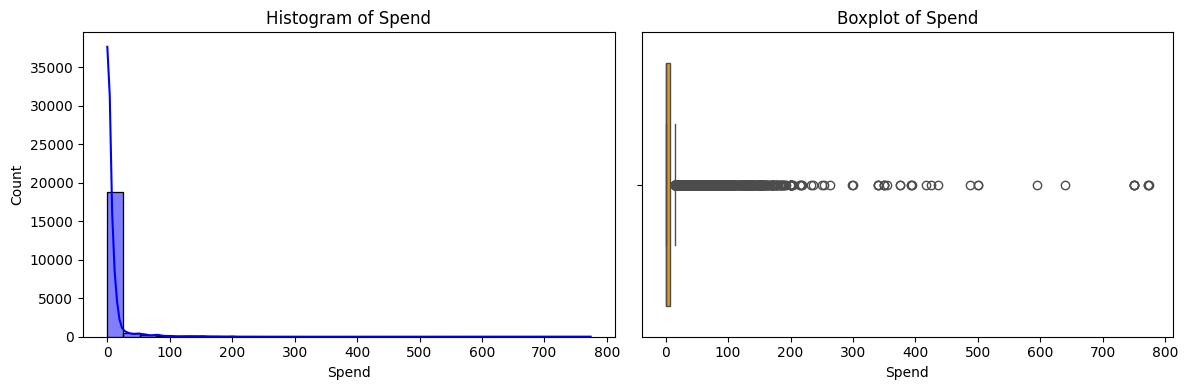

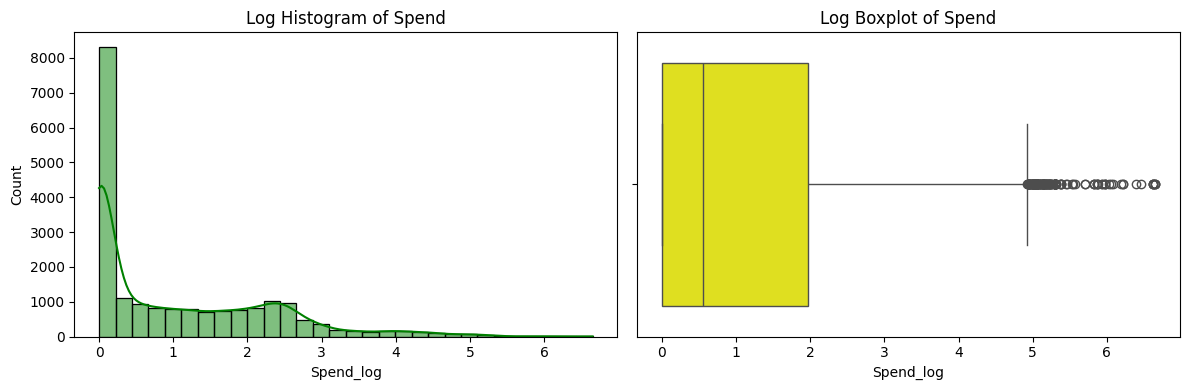

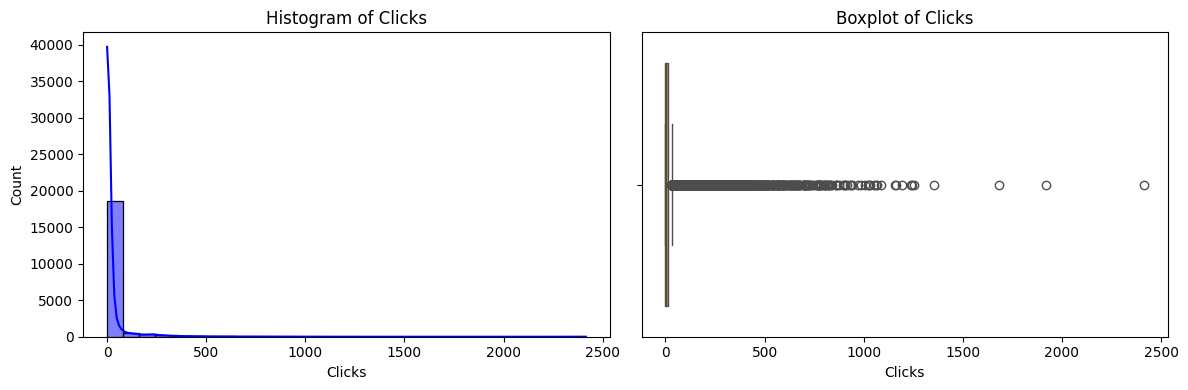

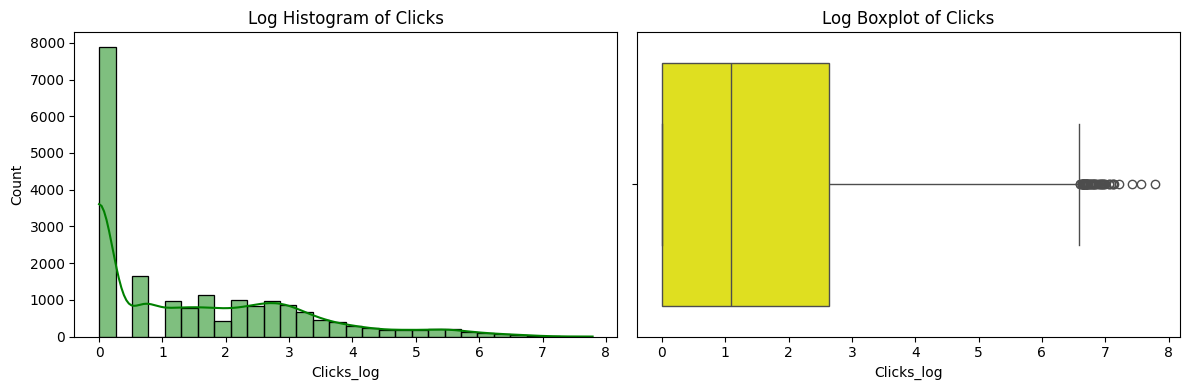

In [13]:
mvf.num_fields_analyze(spend,['Impressions','Spend','Clicks'],['Impressions','Spend','Clicks'])

In [14]:
spend.describe(include=['int','float', 'datetime'])

,Date,Impressions,Spend,Clicks,Impressions_log,Spend_log,Clicks_log
count,19862,19862.00,19862.00,19862.00,19862.00,19862.00,19862.00
mean,2024-01-10 18:21:55.879568896,2571.70,7.53,25.10,4.08,1.06,1.51
min,2023-07-03 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2023-10-09 00:00:00,1.00,0.00,0.00,0.69,0.00,0.00
50%,2024-01-20 00:00:00,82.00,0.74,2.00,4.42,0.55,1.10
75%,2024-04-12 00:00:00,760.75,6.16,13.00,6.64,1.97,2.64
max,2024-06-21 00:00:00,431445.00,774.00,2415.00,12.97,6.65,7.79
std,NaN,11691.23,27.33,87.03,3.18,1.23,1.64


#### SPEND Анализ сводной статистики

- **Date**: данные охватывают период с июля 2023 года по июнь 2024 года. Медианная запись приходится на январь 2024 года.

- **Impressions** - Количество показов рекламы пользователям:
    - наблюдается очень большой разброс данных (диапазон - 431445);
    - при этом 75% записей имеют относительно небольшое количество показов (до 760 - 3 квантиль), однако у нескольких записей экстремально большие значения (см.соотвествующий бохплот) которые зачительно увеличивают на среднее значение;
    - 25% записей имеют до одного показа;
    - среднее число показов составляет 2571, а медианное (50-й перцентиль) — 82. Это говорит о сильной асимметрии данных, так как среднее значение существенно выше медианы.;
    - стандартное отклонение (11691) достаточно высокое, что указывает на сильную изменчивость в количестве показов

- **Spend** - Количество денег, потраченных на рекламную кампанию или  группу объявлений за указанный период:
    - среднее значение затрат (7.53), медиана (0.74) значительно ниже среднего, что указывает на большое количество очень низких расходов, возможно предположить ставку на бесплатную рекламу;
    - большинство записей имеют низкие или нулевые затраты, но есть несколько записей с высокими затратами, что приводит к высокому среднему и стандартному отклонению (27.33);

- **Clicks** -  Количество нажатий пользователей на рекламу:
    - 75 % записей содержат до 13 кликов, что при среднем значении (25.10) и медиане (2) говорит о том, что что распределение данных по кликам с перекосом в сторону низких значений и в целом достаточно низкой эффективностью большинства рекламы;
    - максимальное число кликов (2415) указывают на наличие рекламных кампаний с крайне высокой активностью.

##### Выводы:
- в датафрейме 19862 записей, что представляет достаточно большой объем данных для анализа рекламной активности;
- все числовые значения характеризуются большим диапазоном данных и перекосом в сторону низких значений;
- минимальные значения во всех столбцах равны 0, что означает, что были кампании без показов, затрат и кликов;
- максимальное число показов 431 445, максимальные затраты 774, максимальное число кликов 2 415 — указывают на рекламные кампании с крайне высокой активностью.
- высокое стандартное отклонение показов (11691.23) и кликов (87.03) говорит о сильной изменчивости данных.

#### SPEND Анализ категориальных полей

In [15]:
spend.describe(include=['object','category'])

,Source,Campaign,AdGroup
count,19862,19862,19862
unique,14,52,26
top,Facebook Ads,unknown,wide
freq,9569,3230,6002


In [16]:
spend.nunique()

Date                355
Source               14
Campaign             52
Impressions        4003
Spend              2859
Clicks              552
AdGroup              26
Impressions_log    4003
Spend_log          2859
Clicks_log          552
dtype: int64

Distribution of categorical variables:

Source (Unique values: 15):
  Facebook Ads: 9569 records (48.2%)
  Tiktok Ads: 2985 records (15.0%)
  Youtube Ads: 1784 records (9.0%)
  Google Ads: 1266 records (6.4%)
  Telegram posts: 836 records (4.2%)
  Webinar: 766 records (3.9%)
  Bloggers: 632 records (3.2%)
  SMM: 571 records (2.9%)
  Organic: 514 records (2.6%)
  CRM: 355 records (1.8%)
  Test: 262 records (1.3%)
  Partnership: 234 records (1.2%)
  Offline: 61 records (0.3%)
  Radio: 27 records (0.1%)
  unknown: 0 records (0.0%)
----------------------------------------
Campaign (Unique values: 52):
  unknown: 3230 records (16.3%)
  12.07.2023wide_DE: 2423 records (12.2%)
  02.07.23wide_DE: 1685 records (8.5%)
  youtube_shorts_DE: 1578 records (7.9%)
  03.07.23women: 1508 records (7.6%)
  04.07.23recentlymoved_DE: 1399 records (7.0%)
  07.07.23LAL_DE: 1182 records (6.0%)
  12.09.23interests_Uxui_DE: 1144 records (5.8%)
  15.07.23b_DE: 530 records (2.7%)
  24.09.23retargeting_DE: 505 reco

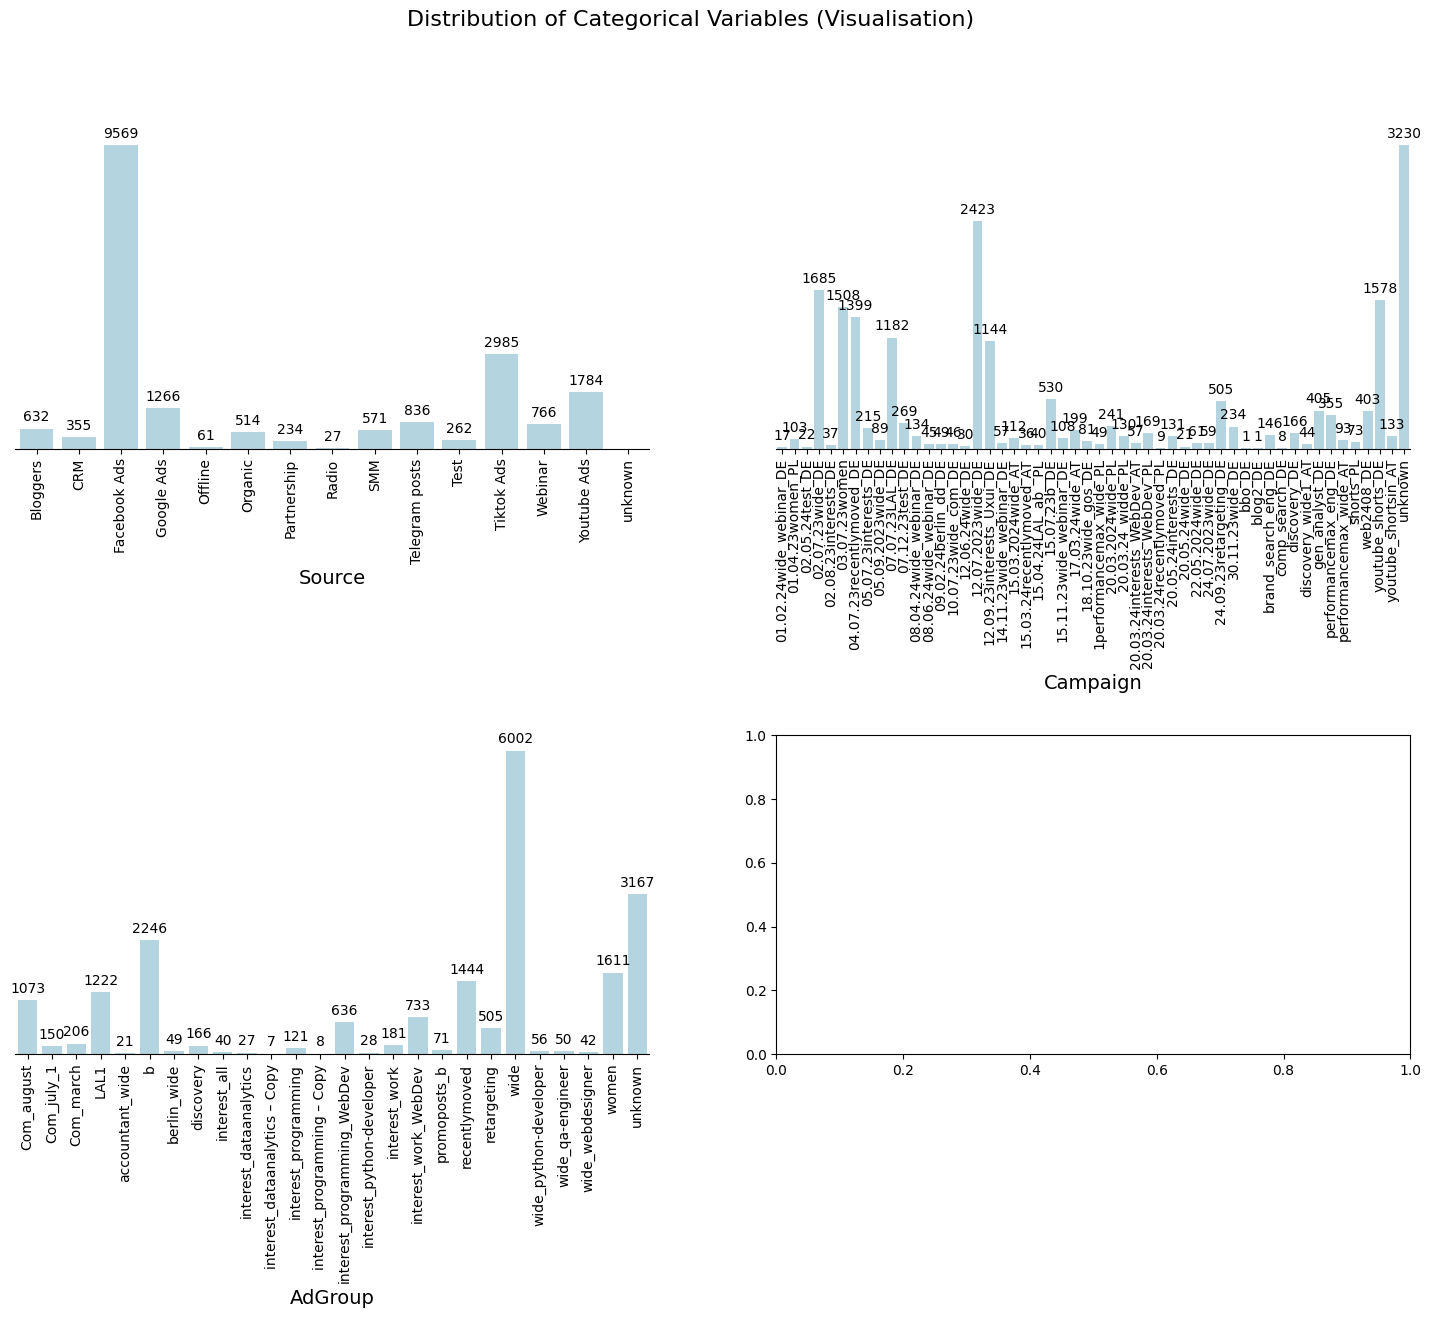

In [17]:
# Distribution of categorical variables
mvf.plot_categorical_distribution(spend)

In [18]:
spend[spend['Source'] == 'Test']['Campaign'].unique()

['07.12.23test_DE', '02.05.24test_DE']
Categories (52, object): ['01.02.24wide_webinar_DE', '01.04.23women_PL', '02.05.24test_DE', '02.07.23wide_DE', ..., 'web2408_DE', 'youtube_shorts_DE', 'youtube_shortsin_AT', 'unknown']

In [19]:
spend[spend['Campaign'].isin(['07.12.23test_DE', '02.05.24test_DE'])]['AdGroup'].unique()

['b', 'wide_webdesigner', 'wide_python-developer', 'wide_qa-engineer', 'interest_python-developer', 'accountant_wide']
Categories (26, object): ['Com_august', 'Com_july_1', 'Com_march', 'LAL1', ..., 'wide_qa-engineer', 'wide_webdesigner', 'women', 'unknown']

##### **Анализ распределения данных**
- **Source** - источники рекламы (Канал, на котором было показано объявление):
    - 15 уникальных значений, из которых один источник **Test** вероятно использовался как тестовый  (1,3% записей) но из  дальнейшего анализа не будем исключать, т.к. полной уверенности нет. Будем расценивать его как специфический источник;
    - Facebook Ads (48.2%) явный лидер по числу записей;
    - в первую пятерку источников рекламы по числу записей входят **Tiktok Ads**(15.0%), **Youtube Ads**(9.0%), **Google Ads**(6.4%) и **Telegram posts**(4.2%)
    - остальные источники суммарно насчитывают 17,2% записей;
    - для проверки эффективности рекламмы в дальнейшем потребуется рассчитать и проанализировать:
        - суммарные затраты по каждому источнику **CpS** (Cost per Source);
        - **CpC** (Cost per Click) стоимость одного клика;
        - показатель кликабельности **CTR** (Click-Through Rate) — сколько пользователей нажали на рекламное объявление или ссылку после просмотра;
        - конверсию в первую покупку **С1**.

- **Campaign** - Кампания, в рамках которой было показано объявление (52 уникальных значения). Наличие 16,3% занчений с неизвестным статусом и лидером по числу записей **12.07.2023wide_DE**(12.2%). Тестовые кампании - '07.12.23test_DE' и '02.05.24test_DE'.
  
- **AdGroup** - Подмножество в кампании, содержащее одно или несколько  объявлений с одинаковыми целями или настройками (26 уникальных значений). Наличие 15,9% значений с неизвестным статусом и лидером по числу записей **wide**(30.2%). Тестовые группы:  'b', 'wide_webdesigner', 'wide_python-developer', 'wide_qa-engineer', 'interest_python-developer', 'accountant_wide';
  
- **Ad** - Конкретная реклама, показываемая пользователям (177 уникальных значений). Наличие 29,8% занчений с неизвестным статусом без явного лидера по числу записей от 0 до 3,6%. Тестовые рекламы: *b1accountant*, *b2accountant*, *b3accountant*, *b4accountant*.

##### Вывод
- Категориальные данные отражают стратегию маркетинга онлайн школы и представляют собой иерархическую структуру Source-Campaign-AdGroup-Ad;
- Наличие достаточного количества отсутстующих  значений в полях Campaign и AdGroup могут внести искажения в расчеты и выводы и говорят о существенных недостатках ведения базы данных CRM и необходимости доработки интерфейса ввода данных;
- Для определения еффективности маркетинга потребуется рассчитать ряд дополнительных показателей таких как CpS, CpC,CTR,C1

### 2.4 DEALS

#### DEALS Рассчет сводной статистики

In [20]:
# загружаем датафрейм
deals = pd.read_pickle("04_deals.pkl")
deals.describe(include=['int', 'int8', 'float']).\
        drop(columns=['Id', 'Contact_Name'], errors='ignore').T

,count,mean,std,min,25%,50%,75%,max
Course_duration,3587.00,10.20,1.83,6.00,11.00,11.00,11.00,11.00
Months_of_study,840.00,5.44,2.92,0.00,3.00,5.00,8.00,11.00
Initial_Amount_Paid,4165.00,929.80,1347.44,0.00,300.00,1000.00,1000.00,11000.00
Offer_Total_Amount,4185.00,7128.72,4636.02,0.00,3000.00,11000.00,11000.00,11500.00
SLA_sec,21593.00,83320.00,627455.11,0.00,0.00,6335.00,46660.00,26908464.00
Paid,21593.00,183.19,1102.21,0.00,0.00,0.00,0.00,12550.00
T,21593.00,0.21,1.20,0.00,0.00,0.00,0.00,11.00
AOV,21593.00,36.91,205.89,0.00,0.00,0.00,0.00,2600.00


#### DEALS Визуализация сводной статистики

Statistical characteristics of number fields:

Course_duration:
 Max: 11.00
 Min: 6.00
 Mean: 10.20
 std: 1.83
 Median: 11.00
 Mode: 11.00
 Range: 5.00
----------------------------------------
Months_of_study:
 Max: 11.00
 Min: 0.00
 Mean: 5.44
 std: 2.92
 Median: 5.00
 Mode: 6.00
 Range: 11.00
----------------------------------------
Initial_Amount_Paid:
 Max: 11000.00
 Min: 0.00
 Mean: 929.80
 std: 1347.44
 Median: 1000.00
 Mode: 1000.00
 Range: 11000.00
----------------------------------------
Offer_Total_Amount:
 Max: 11500.00
 Min: 0.00
 Mean: 7128.72
 std: 4636.02
 Median: 11000.00
 Mode: 11000.00
 Range: 11500.00
----------------------------------------
SLA_sec:
 Max: 26908464.00
 Min: 0.00
 Mean: 83320.00
 std: 627455.11
 Median: 6335.00
 Mode: 0.00
 Range: 26908464.00
----------------------------------------


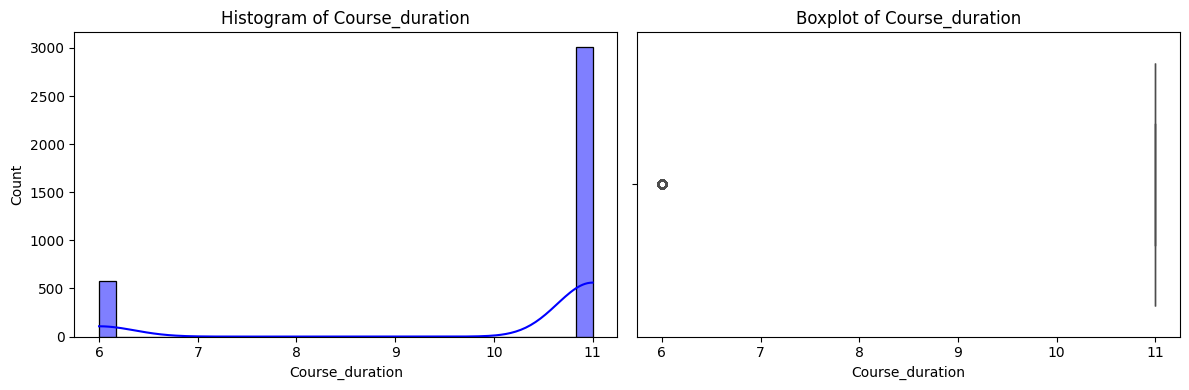

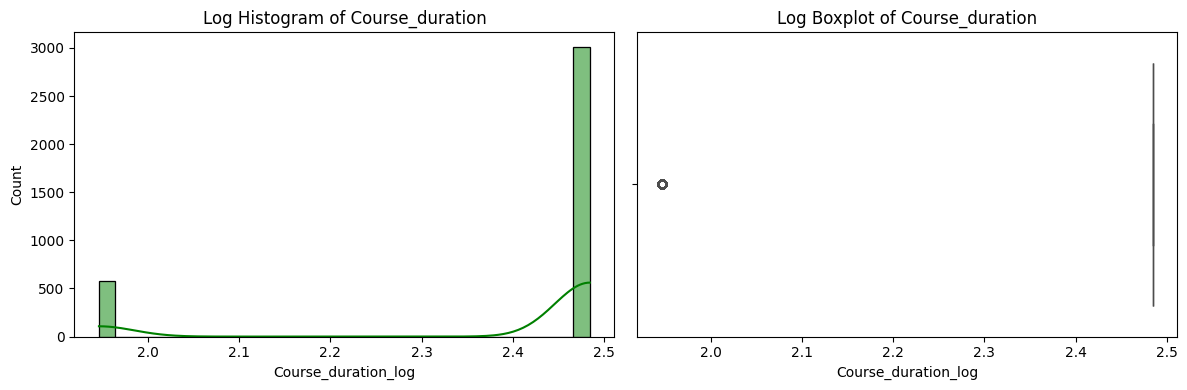

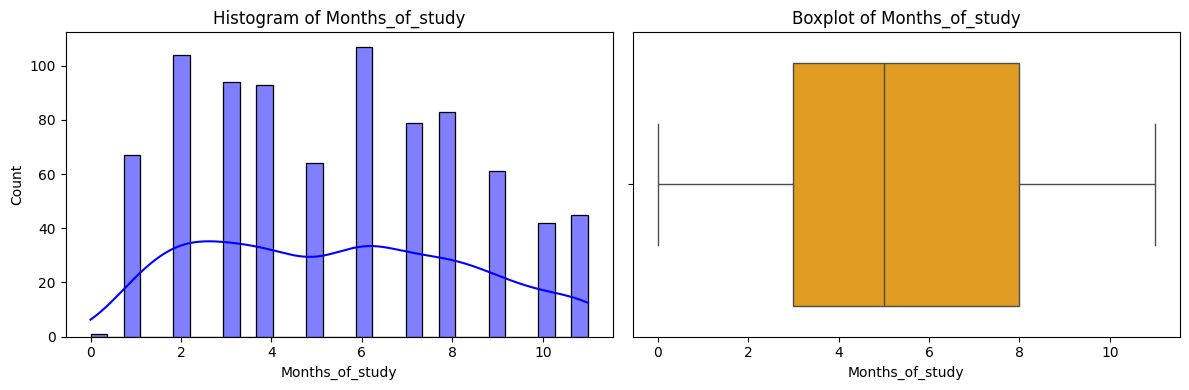

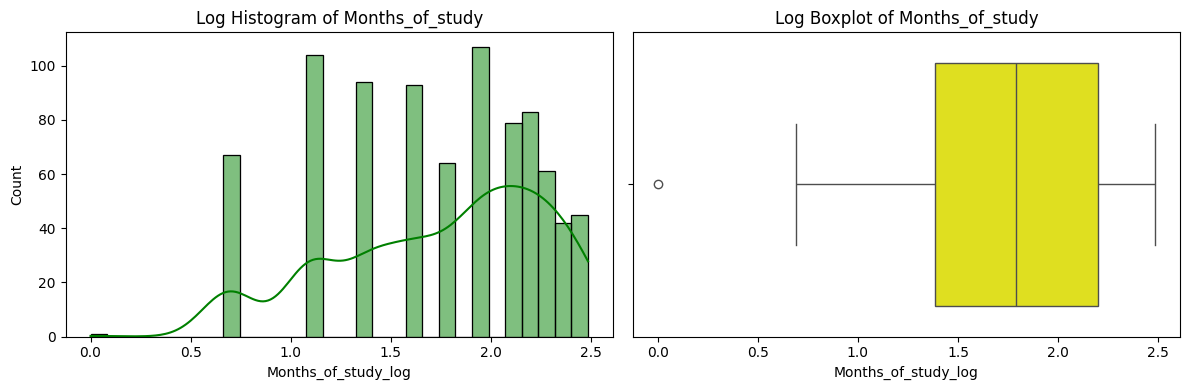

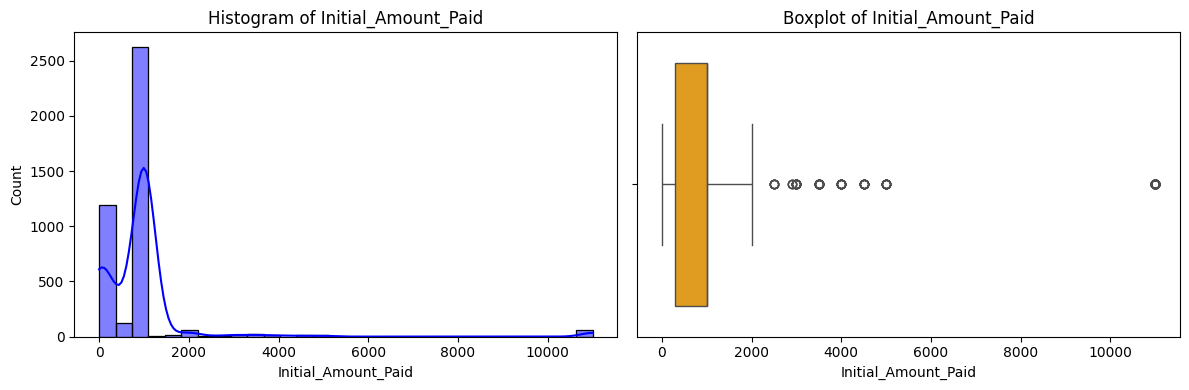

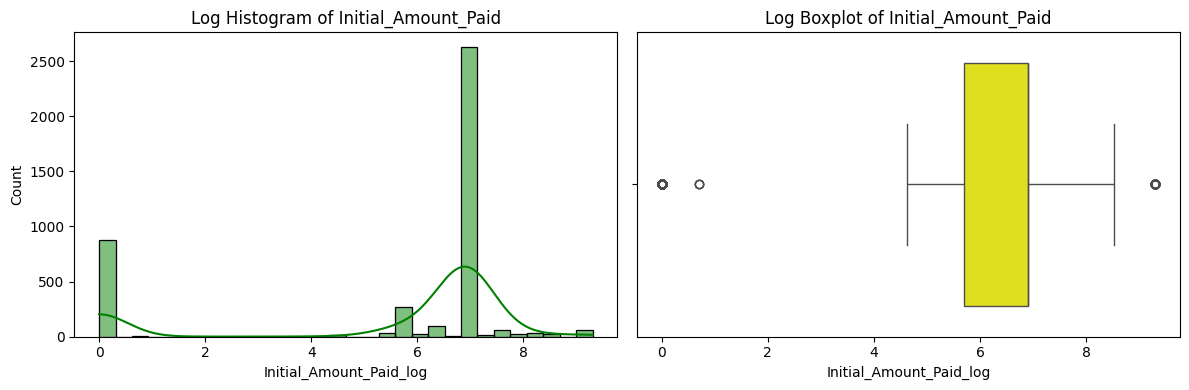

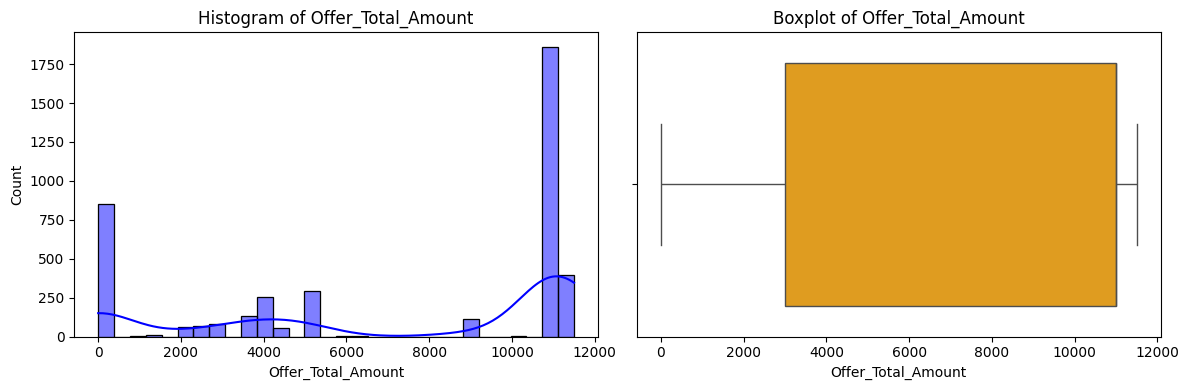

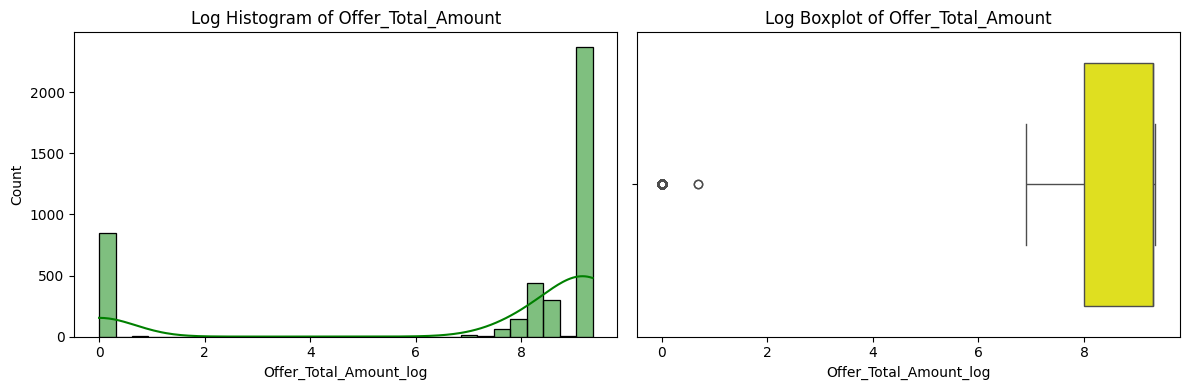

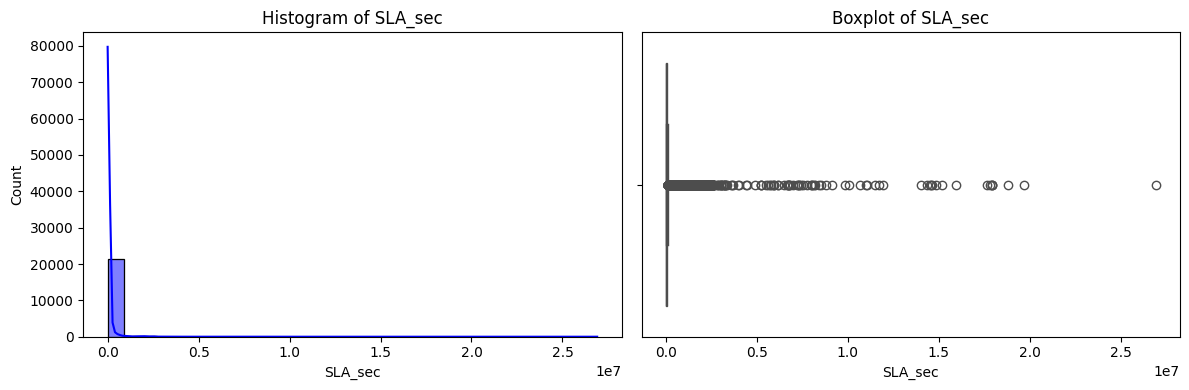

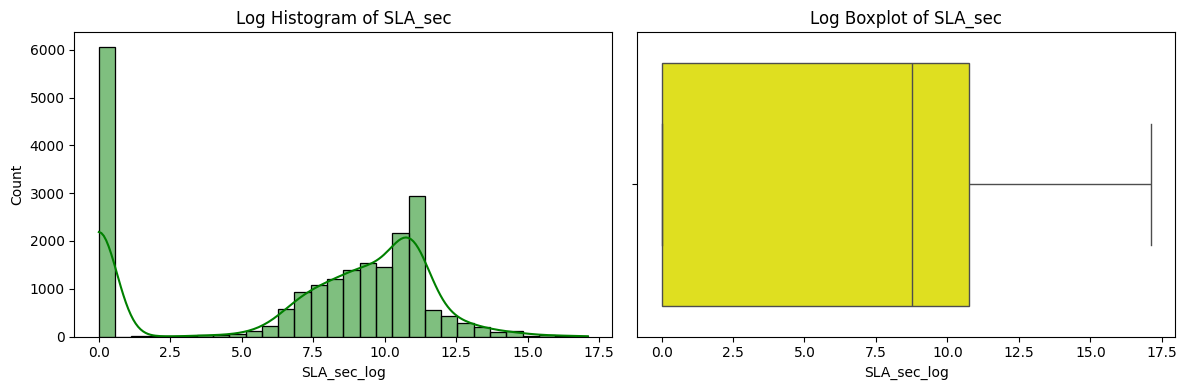

In [21]:
mvf.num_fields_analyze(deals,
    ['Course_duration','Months_of_study','Initial_Amount_Paid','Offer_Total_Amount', 'SLA_sec'],
    ['Course_duration','Months_of_study','Initial_Amount_Paid','Offer_Total_Amount', 'SLA_sec']
)

**Oпределим степень зависимости переменных Offer_Total_Amount и Course_duration**.
Для этого построим диаграмму рассеяния (sns.pairplot()), чтобы визуально оценить тренд и создадим тепловую карту корреляции (sns.heatmap()), чтобы наглядно отобразить силу связи.

Корреляционная матрица:


,Offer_Total_Amount,Course_duration
Offer_Total_Amount,1.00,0.48
Course_duration,0.48,1.00


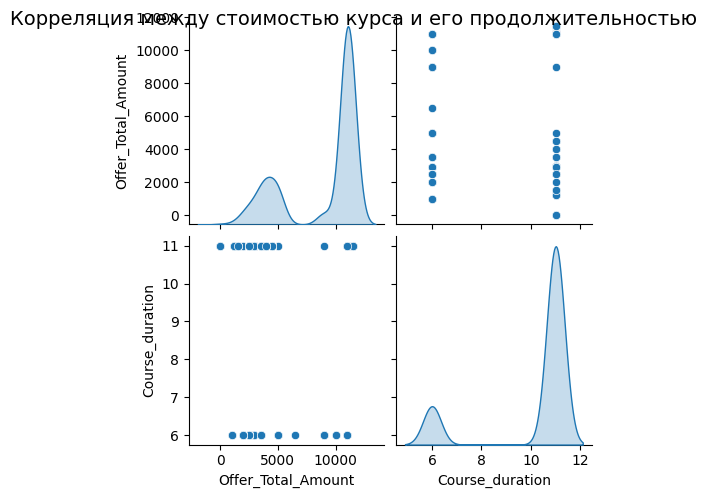

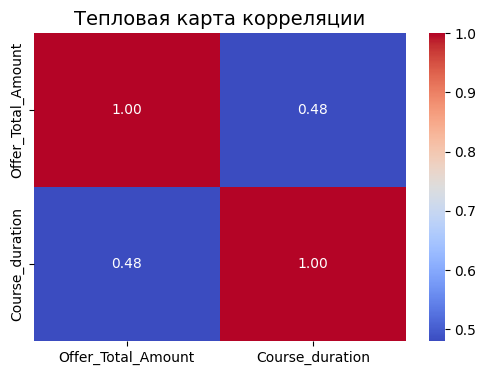

In [22]:
# Select only the required columns
corr_df = deals[['Offer_Total_Amount', 'Course_duration']].dropna()

# Calculate the Pearson correlation coefficient
correlation = corr_df.corr(method='pearson')  # Можно заменить на 'spearman' или 'kendall' для непараметрических данных

print("Корреляционная матрица:")
display(correlation)

# Plotting a correlation graph (pairplot)
sns.pairplot(corr_df, diag_kind='kde')
plt.suptitle("Корреляция между стоимостью курса и его продолжительностью", fontsize=14)
plt.show()

# Build a correlation heat map
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции", fontsize=14)
plt.show()

- Корреляция между **Offer_Total_Amount** (стоимость курса) и **Course_duration** (продолжительность курса) составляет 0.48. 
- Это означает умеренно положительную корреляцию: чем дороже курс, тем дольше его продолжительность, но взаимосвязь не является строгой, т.е. это означает, что стоимость курса частично влияет на его продолжительность, но есть и другие факторы.

**Возможные интерпретации**:
- Дорогие курсы чаще всего длиннее, но есть исключения.
- Курсы средней стоимости могут иметь разную продолжительность.
- Дешёвые курсы могут быть как короткими, так и долгими (например, субсидируемые программы).
- Не все дорогие курсы обязательно самые длинные, возможно, есть премиальные, но короткие программы.

Для дальнейшего анализа построим виолинплоты стоимости курсов по их продолжительности, чтобы понять распределение данных:

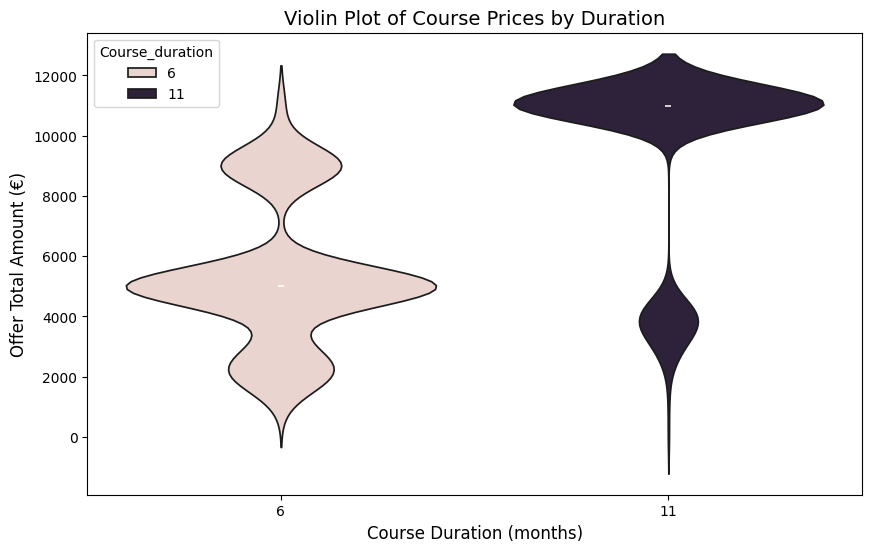

In [23]:
# Creating a violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x=deals["Course_duration"], y=deals["Offer_Total_Amount"], hue=deals["Course_duration"], legend=True)

# Setting up axes and title
plt.xlabel("Course Duration (months)", fontsize=12)
plt.ylabel("Offer Total Amount (€)", fontsize=12)
plt.title("Violin Plot of Course Prices by Duration", fontsize=14)

plt.show()

- violinplot показывает не только медиану и квартильные границы, но и размытость данных, то есть где находится больше всего точек.
- широкие зоны показывают скопление курсов с определёнными ценами

**Основные выводы**:
- Разброс цен для 6-месячных курсов:
    - широкое распределение цен с пиками около 2000€, 6000€ и 10000€.
    - это говорит о том, что 6-месячные курсы могут быть как недорогими, так и премиальными.
- Разброс цен для 11-месячных курсов:
    - цены сосредоточены вокруг 8 000€.
    - меньшая вариативность цен — возможно, эти курсы имеют фиксированные стоимости.
- Общая тенденция:
    - длительные курсы (11 месяцев) имеют более стабильные цены.
    - короткие курсы (6 месяцев) варьируются сильнее, что может означать разные уровни сложности или типов обучения.

**Таким образом** : Стоимость длинных курсов (11 месяцев) в основном выше, но короткие (6 месяцев) могут быть как доступными, так и премиальными.

Для более полного анализа добавим колонку Education_Type, которая уточняет тип курсов: утренние или вечерние

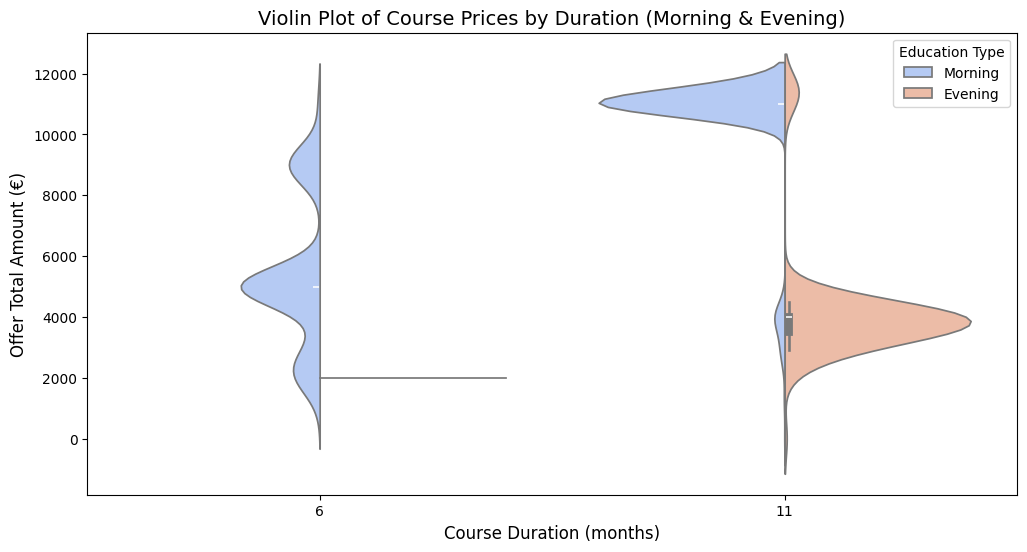

In [24]:
# Data filtering: removing "unknown"
filtered_deals = deals[deals["Education_Type"].isin(["Morning", "Evening"])].copy()

# Specify the order of categories to avoid the appearance of "unknown"
filtered_deals["Education_Type"] = pd.Categorical(filtered_deals["Education_Type"], 
                                                  categories=["Morning", "Evening"], ordered=True)

# violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x=filtered_deals["Course_duration"], 
               y=filtered_deals["Offer_Total_Amount"], 
               hue=filtered_deals["Education_Type"], 
               split=True, palette="coolwarm")

# Setting up axes and title
plt.xlabel("Course Duration (months)", fontsize=12)
plt.ylabel("Offer Total Amount (€)", fontsize=12)
plt.title("Violin Plot of Course Prices by Duration (Morning & Evening)", fontsize=14)
plt.legend(title="Education Type")

plt.show()

- Для 6-месячных курсов:
    - Morning курсы имеют более широкий разброс цен, с основными пиками около 4 000€ и 8 000€.
    - Evening курсы представлены гораздо меньшим числом данных, и их распределение более узкое.
- Для 11-месячных курсов:
    - Morning курсы имеют большую концентрацию около 8 000€.
    - Evening курсы сосредоточены в районе 4 000€, что указывает на возможное разделение ценовых сегментов между утренними и вечерними программами.
- Общие тенденции:
    - Morning курсы чаще дороже, особенно при большой продолжительности (11 месяцев).
    - Evening курсы менее распространены, и их стоимость, как правило, ниже, особенно на длинных курсах.
- **Вывод**: Стоимость курсов зависит от типа обучения.
    - Morning курсы более дорогие и разнообразные по цене.
    - Evening курсы имеют меньший разброс стоимости, особенно на долгосрочных программах.
    - Курсы на 11 месяцев чаще стоят дороже, особенно если они проводятся утром

#### DEALS Анализ сводной статистики

###### 1. Датафрейм содержит 21 593 записи, но не все столбцы полностью заполнены (например, Course_duration имеет 3 580 записей, Months_of_study — 840).

2. Анализ продолжительности обучения (Course_duration)
Средняя продолжительность курса: 10.2 месяца, но медиана и 75-й перцентиль равны 11 месяцам, что говорит о стандартной длительности учебных программ.

3. Время реального обучения (Months_of_study):
- Среднее 5.44 месяцев, но широкий разброс значений (стандартное отклонение 2.92). Максимальное значение 11 месяцев
- Большинство студентов учатся от 3 до 8 месяцев (по квартилям).
- Минимальное значение 0 месяцев, что может указывать на студентов, которые только начали курс или ждут начала обучения.

4. Финансовые показатели (Initial_Amount_Paid, Offer_Total_Amount)
Средний размер платежа: 930, но медианное значение 1000, что говорит о смещении распределения.
Разброс значений: Стандартное отклонение 1348.83, что указывает на значительную вариативность.
Минимальная сумма 0, что возможно связано с полными скидками или отсутствием платежа.
Максимальная сумма 11 000, что подтверждает наличие дорогих курсов.

5. Общая сумма предложения (Offer_Total_Amount):
- Среднее 7 128, медиана 11 000, что говорит о большом разрыве между фактическими платежами и предложенной ценой.
- Нулевая минимальная стоимость → возможны бесплатные предложения.
- Максимальная стоимость 11 500, что говорит о стандартном ценовом диапазоне курсов.

6. SLA и время обработки (SLA_sec)
- Среднее время ответа: 83 319 секунд (≈ 23 часа), но медианное значение всего 6 335 секунд (≈ 1.76 часа).
- Сильный разброс значений (стандартное отклонение 627 455 секунд):
- Минимальное 0, что указывает на мгновенные ответы.
- Максимальное время ответа — 26 908 464 секунд (≈ 312 дней), что указывает на аномалии или долгие задержки.

7. Логарифмированные данные (log версии столбцов)
Логарифмическое преобразование помогло нормализовать распределения:
- Initial_Amount_Paid_log: среднее 5.4, медиана 6.9 → данные стали ближе к нормальному распределению.
- Offer_Total_Amount_log: среднее 7.16, медиана 9.3 → аналогично скорректировано влияние высоких значений.
- SLA_sec_log: среднее 6.98, медиана 8.75 → снижено влияние выбросов.
- Course_duration_log и Months_of_study_log показали небольшую вариативность, но логарифмическое преобразование привело их к компактному диапазону.

**Выводы:**
- Курсы в основном длятся 6 и  11 месяцев.
- Большинство предложений и первоначальных платежей сосредоточены вокруг значений 1000 и 11000 соответственно, что указывает на возможное фиксированное ценообразование.
- В целом, существует зависимость между длительностью и ценой курса, но она не является строгой → стоимость курса оказывает умеренное влияние на его продолжительность, но есть и другие важные факторы, например как тип курса утренний (когда обучение преимущественно является отновным видом деятельности для студента на данный момент) или вечерний (в большинстве случаем работающие студенты).
- Время отклика по SLA значительно варьируется, что говорит о различной оперативности обслуживания клиентов. Причины длительных (свыше 10 дней) и экстремальных (≈ 312 дней) задержек в обслуживании  требуют обсуждения в отделе продаж. 

#### DEALS Анализ категориальных полей

In [25]:
deals.select_dtypes(include=['object','category']).columns.tolist()

['Id',
 'Deal_Owner_Name',
 'Quality',
 'Stage',
 'Lost_Reason',
 'Campaign',
 'Term',
 'Source',
 'Payment_Type',
 'Product',
 'Education_Type',
 'Contact_Name',
 'City',
 'Level_of_Deutsch',
 'Country',
 'Latitude',
 'Longitude']

Distribution of categorical variables:

Deal_Owner_Name (Unique values: 27):
  Charlie Davis: 2963 records (13.7%)
  Julia Nelson: 2241 records (10.4%)
  Ulysses Adams: 2166 records (10.0%)
  Quincy Vincent: 1884 records (8.7%)
  Paula Underwood: 1862 records (8.6%)
  Ben Hall: 1345 records (6.2%)
  Nina Scott: 1283 records (5.9%)
  Victor Barnes: 1232 records (5.7%)
  Cara Iverson: 1056 records (4.9%)
  Diana Evans: 1015 records (4.7%)
  Jane Smith: 988 records (4.6%)
  Rachel White: 871 records (4.0%)
  Kevin Parker: 574 records (2.7%)
  Ian Miller: 497 records (2.3%)
  Eva Kent: 460 records (2.1%)
  Bob Brown: 340 records (1.6%)
  Mason Roberts: 268 records (1.2%)
  Oliver Taylor: 163 records (0.8%)
  George King: 109 records (0.5%)
  Yara Edwards: 85 records (0.4%)
  Sam Young: 67 records (0.3%)
  Amy Green: 66 records (0.3%)
  Alice Johnson: 31 records (0.1%)
  John Doe: 20 records (0.1%)
  Xander Dean: 3 records (0.0%)
  Wendy Clark: 2 records (0.0%)
  Zachary Foster: 1 records (

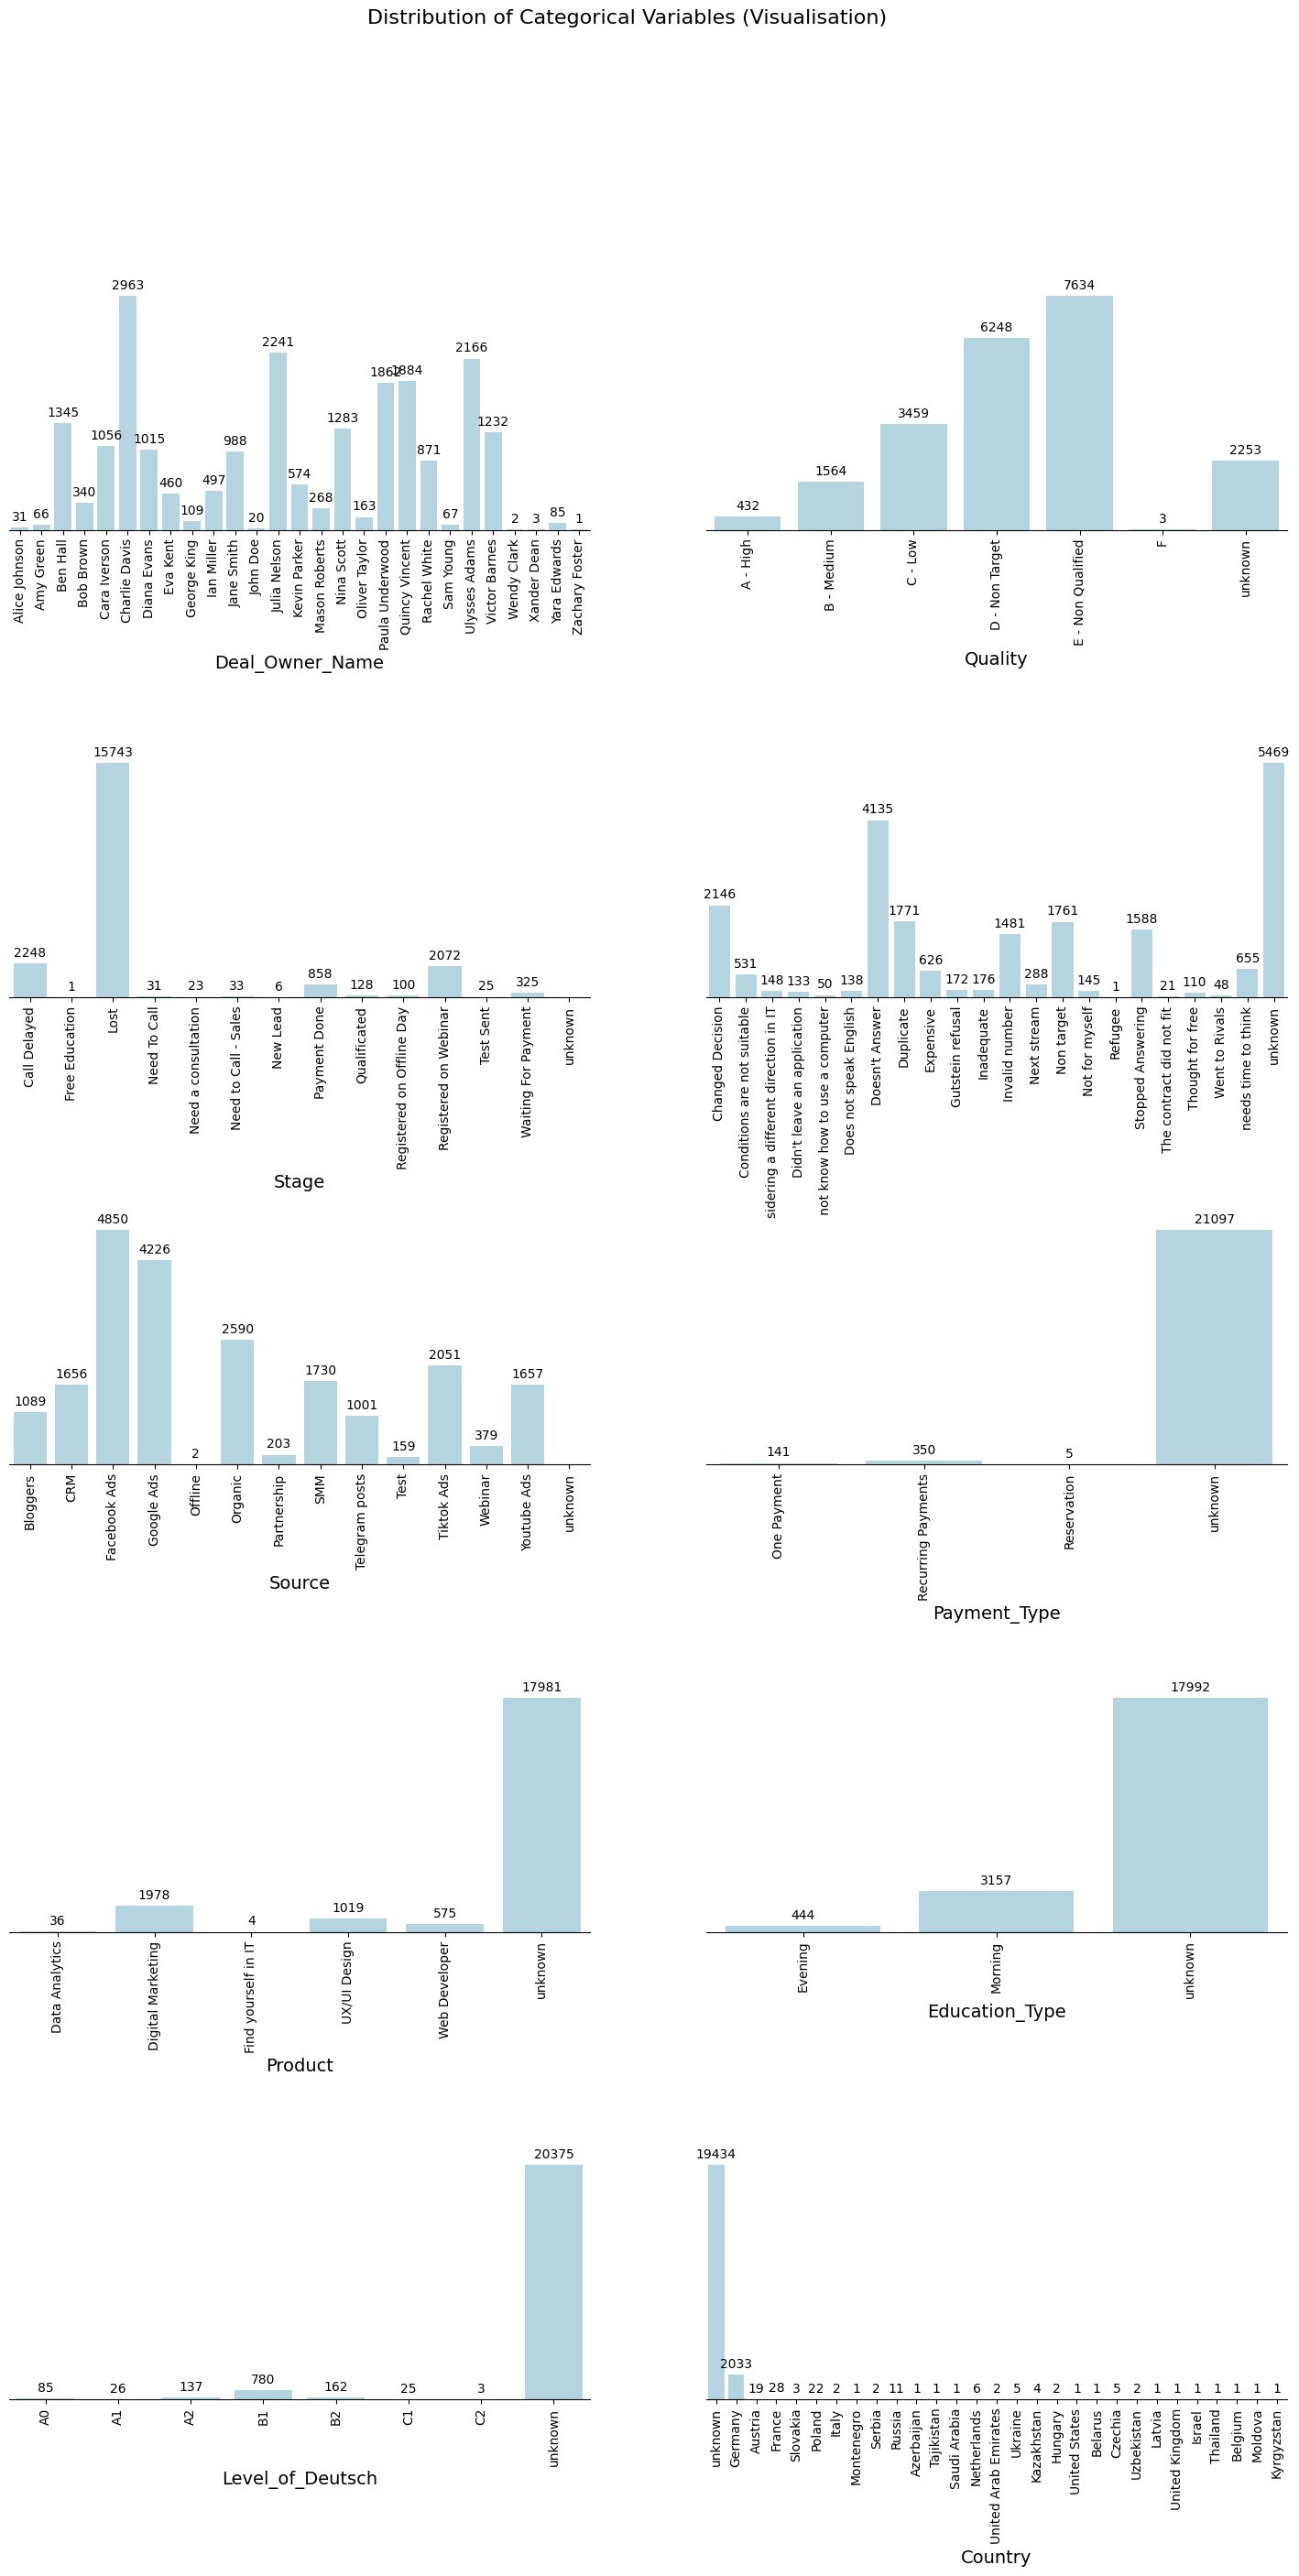

In [26]:
# Distribution of categorical variables
deals_cat_fields =['Deal_Owner_Name','Quality','Stage','Lost_Reason','Source','Payment_Type','Product','Education_Type','Level_of_Deutsch','Country']
mvf.plot_categorical_distribution(deals,deals_cat_fields)

**Предварительные выводы из описательной статистики категориальных данных DataFrame deals**:

1. **Владельцы сделок (Deal_Owner_Name)**
    - 13.7% сделок у Charlie Davis, далее идут Julia Nelson (10.4%) и Ulysses Adams (10.1%).
    - в топ-10 владельцев концентрируется более 70% всех сделок, что указывает на сильную асимметрию в распределении.
    - некоторые владельцы имеют < 1% сделок, что говорит о низкой вовлечённости части команды.
2. **Качество лида (Quality)**
    - 35.4% лидов — "E - Non Qualified" - эти сделки не соответствуют критериям (могут быть нецелевыми или неконвертируемыми).
    - 29% — "D - Non Target" → ещё одна большая категория потенциально неподходящих клиентов.
    - "A - High" составляет всего 2% всех сделок → очень мало лидов с высокой квалификацией.
    - 10.5% записей имеют "unknown" свидетельствует о низкой дисциплине по заполненнению данных в CRM.

3. **Этапы продаж (Stage)**
    - 72.9% сделок находятся на этапе "Lost", что указывает на высокую долю потерь клиентов.
    - "Registered on Webinar" и "Call Delayed" — два больших этапа (~10% каждый), что говорит о том, что многие лиды проходят вебинары и нуждаются в повторных звонках.
    - только 3.9% сделок завершились оплатой, а ещё 1.5% ожидают оплаты.
    - низкий процент сделок достигает стадии "Qualificated" (0.6%) → сложности с переводом клиентов на финальные этапы.

4. **Причины потерь (Lost_Reason)**
    - 25.3% сделок потеряны по "unknown" причине - детальный анализ этого сегмента ввиду отсутствия данных невозможен.
    - чаще всего клиенты просто "Не отвечают" (19.2%) следует рассмотреть резервные каналы связи при регистрации.
    - 9.9% "Changed Decision", возможна необходимость работы с возражениями.
    - 6.9% потерь из-за "Invalid number", возможно, ошибки в сборе контактных данных.
    - 5% клиентов ошибочно думали, что курс бесплатный, важно проверять, как подаётся цена.

5. **Источник лида (Source)**
- Главные источники:
    - Facebook Ads (22.5%) и Google Ads (19.6%) → основные рекламные каналы.
    - Tiktok Ads (9.5%) и SMM (8%) также вносят значительный вклад.
    - Блогеры, Telegram и CRM — около 5-7% каждого.
    - Webinar (1.8%) и Offline (0%) → низкая конверсия через вебинары и офлайн-мероприятия.

6. **Способы оплаты (Payment_Type)**
    - 97.7% данных "unknown" → платежные данные требуют серьёзного уточнения!!!
    - 1.6% сделок через Recurring Payments (рассрочку).
    - 0.6% — One Payment (полная оплата сразу).
    - минимальная категория — Reservation (5 сделок) - почти не используется.

7. **Продукт (Product)**
    - 83.3% записей "unknown" → данные о продукте почти отсутствуют.
    - 9.1% сделок связаны с Digital Marketing, 4.7% — UX/UI Design.
    - Web Developer (2.6%) и Data Analytics (0.2%) имеют меньшее присутствие.
    - низкая диверсификация продуктов — 4 ведущих направления занимают почти весь рынок.

8. **Тип обучения (Education_Type)**
    - 84.8% записей "unknown", что затрудняет анализ.
    - из известных категорий: "Morning" (13.4%) и "Evening" (1.9%).
    - курсы, проходящие утром, более популярны, чем вечерние.

9. **Уровень владения немецким (Level_of_Deutsch)**
    94.4% записей "unknown", что делает анализ неполным.
    - среди известных уровней:
        - B1 (3.6%) и B2 (0.8%) встречаются чаще всего.
        - C1 и C2 (0.1%) — крайне редки.
        - большая часть клиентов — либо без знаний языка, либо на начальных уровнях.

10. **Страна (Country)**
    - 90% записей "unknown" - географические данные не заносятся и требуют уточнения.
    - среди известных стран:
        - Германия (9.4%) — единственная значимая категория.
        - Франция, Польша, Австрия, Россия и другие страны имеют меньше 0.1% записей.
    - распределение стран показывает, что курсами интересуются в основном клиенты из Германии.

**Предварительные выводы**:
- Много данных с unknown, что затрудняет полноценный анализ.
- Основные переменные, которые требуют уточнения: Payment_Type, Product, Education_Type, Country, Level_of_Deutsch. 
-  Высокая доля потерянных сделок (Lost = 72.9%), требуется дополнительный анализ потерь.
-  Основные рекламные каналы — Facebook и Google Ads, но другие источники тоже имеют значимый вклад.
-  Конверсия в успешные сделки низкая (Payment Done = 3.9%), нужно улучшать стратегию продаж.
-  Время обучения влияет на стоимость (Morning курсы более распространены).
-  Клиенты чаще не отвечают или изменяют решение, чем уходят к конкурентам.